# **Propósito del Proyecto**

Este proyecto se centra en el análisis de datos de ventas con el fin de identificar patrones de comportamiento, tendencias y factores que influyen en la rentabilidad y el rendimiento comercial. Se cuenta con datos de 51,000 transacciones comerciales con diferentes categorías de productos e información clave sobre el volumen de las ventas en periodos estacionales de tiempo a lo largo del año.

# **Objetivos**

# **Importaciones**

In [21]:
# importa las librerías necesarias
import numpy as np                         # cálculo numérico
import pandas as pd                        # manipulación de datos
import matplotlib.pyplot as plt            # visualización
import seaborn as sns                      # visualización de datos avanzada
import warnings                            # alertas
from matplotlib import font_manager as fm  # gestión de tipografías
from scipy import stats                    # cálculos matemáticos y estadísticos
import statsmodels.api as sm               # modelos estadísticos
import calendar
import locale


# escalado y normalización
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
# transformaciones categóricas y codificación
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# imputación de valores faltantes]
# from sklearn.impute import SimpleImputer
# selección de características
# from sklearn.feature_selection import SelectKBest, chi2
# transformaciones avanzadas y combinación
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# división de datos
# from sklearn.model_selection import train_test_split

# desactiva las advertencias
warnings.filterwarnings('ignore')

# carga los datos de Kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-data/sales_data.csv
/kaggle/input/font-palatino-linotype/PALAB.TTF
/kaggle/input/font-palatino-linotype/PALAI.TTF
/kaggle/input/font-palatino-linotype/PALABI.TTF
/kaggle/input/font-palatino-linotype/PALA.TTF


# **Análisis Exploratorio de Datos (EDA)**

In [22]:
# cargar el dataset
df = pd.read_csv('/kaggle/input/sales-data/sales_data.csv')

# imprime las primeras 8 filas
df.head(8)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005
5,6,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0.0,21.32,4.72,Medium,VE_006
6,7,MX-2013-134096,27/09/2013,01/10/2013,Standard Class,DP-13000,OFF-EN-10001375,Office Supplies,Envelopes,"GlobeWeis Mailers, with clear poly window",56.12,2,0.0,21.32,4.11,Medium,VE_006
7,8,MX-2013-134096,27/09/2013,01/10/2013,Standard Class,DP-13000,TEC-MA-10004956,Technology,Machines,"Konica Card Printer, Red",344.64,3,0.0,165.42,26.20,Medium,VE_007


In [6]:
# imprime las ultimas 8 filas
df.tail(8)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
51282,51283,RS-2014-4620,14/08/2014,16/08/2014,Second Class,CR-2625,OFF-FIS-10004787,Office Supplies,Supplies,"Fiskars Box Cutter, Steel",34.92,1,0.0,11.16,1.27,Medium,VE_047
51283,51284,RS-2014-4620,14/08/2014,16/08/2014,Second Class,CR-2625,FUR-SAU-10002255,Furniture,Bookcases,"Sauder Classic Bookcase, Pine",3498.72,8,0.0,594.72,410.05,Medium,VE_049
51284,51285,HU-2012-7730,05/09/2012,07/09/2012,First Class,NF-8385,OFF-CAR-10000687,Office Supplies,Binders,"Cardinal Binder Covers, Economy",48.00,4,0.0,1.92,9.76,High,VE_048
51285,51286,HU-2012-7730,05/09/2012,07/09/2012,First Class,NF-8385,OFF-AVE-10004570,Office Supplies,Binders,"Avery Binder Covers, Economy",11.07,1,0.0,3.42,1.98,High,VE_047
51286,51287,HU-2012-7730,05/09/2012,07/09/2012,NaN,NF-8385,TEC-LOG-10004419,Technology,Accessories,"Logitech Flash Drive, USB",61.44,2,0.0,18.42,13.02,High,VE_032
51287,51288,HU-2012-7730,05/09/2012,07/09/2012,First Class,NF-8385,OFF-BOS-10002705,Office Supplies,Art,"Boston Highlighters, Fluorescent",80.52,4,0.0,20.88,8.78,High,VE_048
51288,51289,HU-2012-7730,05/09/2012,07/09/2012,First Class,NF-8385,OFF-ENE-10004132,Office Supplies,Paper,"Enermax Computer Printout Paper, 8.5 x 11",130.44,4,0.0,33.84,18.97,High,VE_047
51289,51290,IZ-2011-5750,25/08/2011,29/08/2011,Standard Class,SZ-10035,OFF-ACC-10002343,Office Supplies,Binders,"Acco 3-Hole Punch, Durable",31.62,1,0.0,12.96,2.40,Medium,VE_048


In [7]:
# imprime la información del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       49720 non-null  object 
 5   customer_id     51290 non-null  object 
 6   product_id      51290 non-null  object 
 7   category        51290 non-null  object 
 8   sub_category    51290 non-null  object 
 9   product_name    49993 non-null  object 
 10  sales           51290 non-null  float64
 11  quantity        51290 non-null  int64  
 12  discount        51290 non-null  float64
 13  profit          51290 non-null  float64
 14  shipping_cost   51290 non-null  float64
 15  order_priority  50244 non-null  object 
 16  vendor_code     51290 non-null  object 
dtypes: float64(4), int64(2), object

In [8]:
# imprime la estructura del dataset
print(df.columns.tolist())

['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'product_id', 'category', 'sub_category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority', 'vendor_code']


In [9]:
# imprime la estructura del dataset
print(df.shape)

(51290, 17)


In [10]:
# agrupa por categoría y suma el total de ventas
print(df.groupby('category')['sales'].sum().round(2).sort_values(ascending = False))

category
Technology         4744557.50
Furniture          4110874.19
Office Supplies    3787070.23
Name: sales, dtype: float64


In [11]:
# agrupa por categoría y suma el total de la cantidad
print(df.groupby('category')['quantity'].sum().round(2).sort_values(ascending = False))

category
Office Supplies    108182
Technology          35176
Furniture           34954
Name: quantity, dtype: int64


In [12]:
# agrupa por categoría y suma el total de ganancias
df.groupby('category')['profit'].sum().round(2).sort_values(ascending = False)

category
Technology         663778.73
Office Supplies    518473.83
Furniture          285204.72
Name: profit, dtype: float64

In [13]:
# agrupa por categoría y obtiene la media de ganancias
df.groupby('category')['profit'].mean().round(2).sort_values(ascending = False)

category
Technology         65.45
Furniture          28.88
Office Supplies    16.58
Name: profit, dtype: float64

In [14]:
# agrupa por categoría y obtiene la media de ganancias
df.groupby('category')['sales'].mean().round(2).sort_values(ascending = False)

category
Technology         467.86
Furniture          416.25
Office Supplies    121.10
Name: sales, dtype: float64

In [15]:
# agrupa por categoría y obtiene el promedio de ganancias
df.groupby('category')['profit'].mean().round(2).sort_values(ascending = False)

category
Technology         65.45
Furniture          28.88
Office Supplies    16.58
Name: profit, dtype: float64

# **Visualización de datos**

In [29]:
# Configurar tamaño de los gráficos
plt.rcParams['figure.figsize'] = [6, 4]

# define el estilo de los gráficos
plt.style.use('default')

# Configurar paleta de colores
sns.set_palette('viridis')

# Tamaño de letra
plt.rcParams['font.size'] = 12

# Ruta a la fuente personalizada
font_path = '/kaggle/input/font-palatino-linotype/PALAB.TTF'

# Registrar la fuente en matplotlib
font_prop = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)  

# Configurar como fuente predeterminada para todos los textos (títulos, etiquetas y números)
plt.rcParams['font.family'] = font_prop.get_name()

#plt.rcParams.update({
#   "font.family": font_prop.get_name(),
#   "font.weight": "bold",
#   "axes.titleweight": "bold",
#   "axes.labelweight": "bold",       
#   "axes.titleweight": "bold",
#   "lines.linewidth": 1.5, 
#   "lines.color": "black"
#})

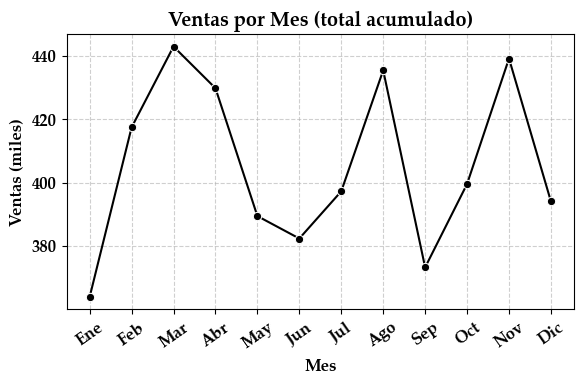

In [28]:
# Convierte las fechas
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Extrae mes y año
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Agrupa ventas por mes
sales_by_month = df.groupby('month')['sales'].sum().reset_index()

# Para hacer más comprensible la escala
sales_by_month['sales_k'] = sales_by_month['sales'] / 1000  # ventas en miles

# Preparar nombres de meses en español
month_names = {
    1: "Ene", 2: "Feb", 3: "Mar", 4: "Abr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dic"
}
sales_by_month['mes_abbr'] = sales_by_month['month'].map(month_names)

# Orden correcto por mes
sales_by_month = sales_by_month.sort_values('month')

# Gráfico
plt.figure(figsize=(6, 4))
sns.lineplot(
    data=sales_by_month,
    x='mes_abbr',
    y='sales_k',
    marker='o',
    linewidth=1.5,
    color='black'
)

plt.title("Ventas por Mes (total acumulado)")
plt.xlabel("Mes")
plt.xticks(rotation=35)
plt.ylabel("Ventas (miles)")

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


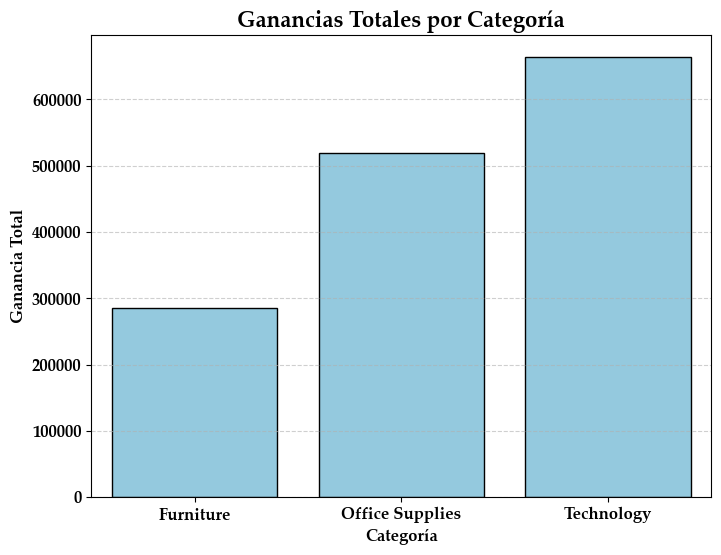

In [32]:
# Agrupamos ganancias por categoría
profit_by_category = df.groupby('category')['profit'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(data=profit_by_category, x='category', y='profit', color="skyblue", edgecolor="black")

plt.title("Ganancias Totales por Categoría", fontsize=16, weight='bold')
plt.xlabel("Categoría", fontsize=12, weight='bold')
plt.ylabel("Ganancia Total", fontsize=12, weight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

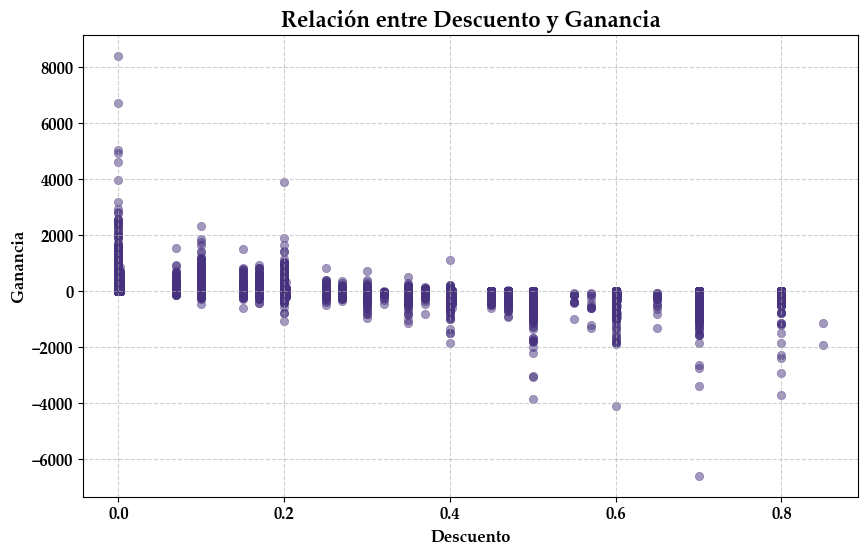

In [33]:
# grafico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='discount', 
    y='profit', 
    alpha=0.5, 
    edgecolor=None
)

plt.title("Relación entre Descuento y Ganancia", fontsize=16, weight='bold')
plt.xlabel("Descuento", fontsize=12, weight='bold')
plt.ylabel("Ganancia", fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


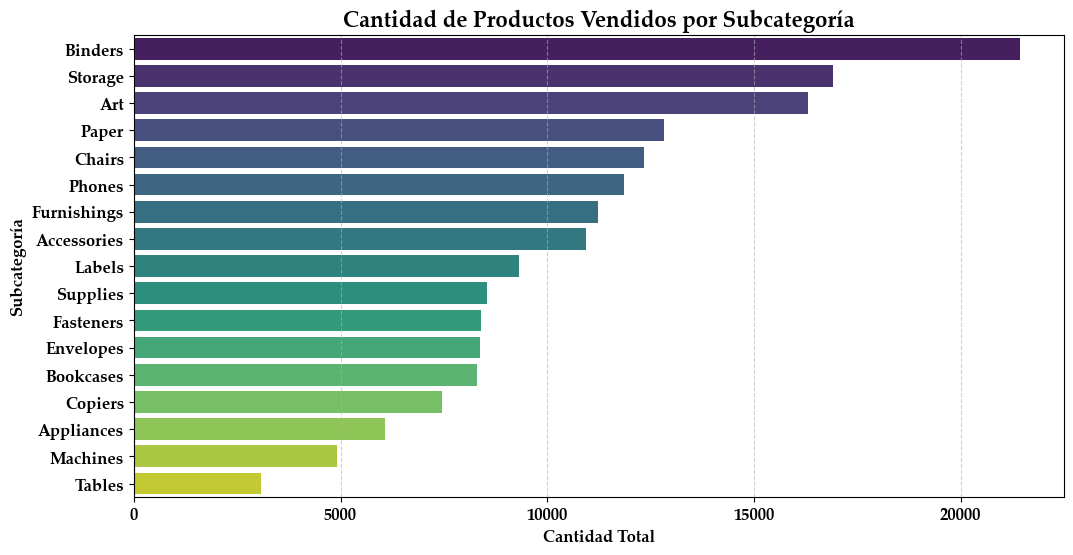

In [34]:
# Agrupa cantidad por subcategoría
qty_by_subcat = df.groupby('sub_category')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=qty_by_subcat, x='quantity', y='sub_category', palette="viridis")

plt.title("Cantidad de Productos Vendidos por Subcategoría", fontsize=16, weight='bold')
plt.xlabel("Cantidad Total", fontsize=12, weight='bold')
plt.ylabel("Subcategoría", fontsize=12, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

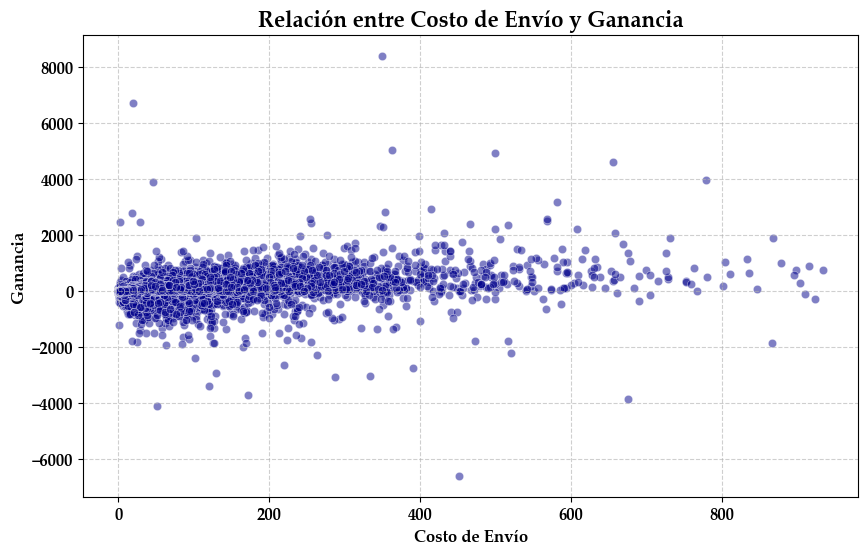

In [38]:
# gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df, 
    x='shipping_cost', 
    y='profit', 
    alpha=0.5,
    color="darkblue"
)

plt.title("Relación entre Costo de Envío y Ganancia", fontsize=1, weight='bold')
plt.xlabel("Costo de Envío", fontsize=12, weight='bold')
plt.ylabel("Ganancia", fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

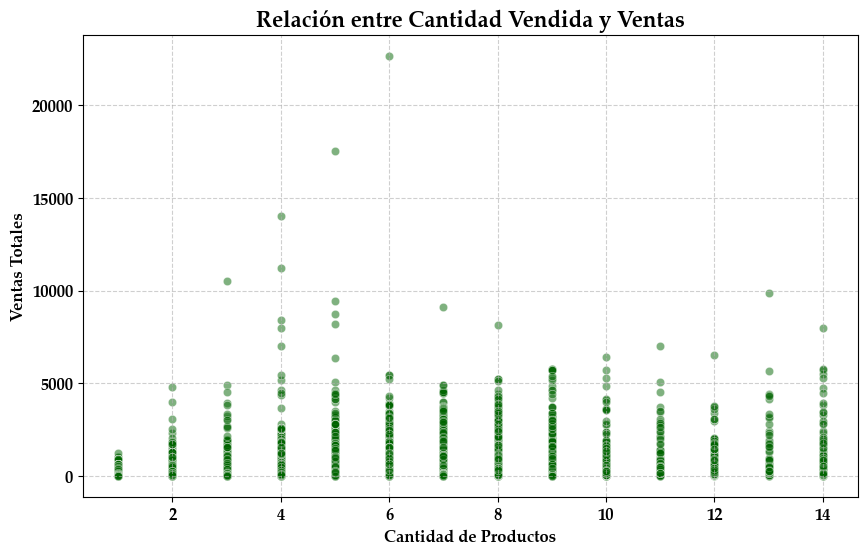

In [37]:
# gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='quantity',
    y='sales',
    alpha=0.5,
    color="darkgreen"
)

plt.title("Relación entre Cantidad Vendida y Ventas", fontsize=16, weight='bold')
plt.xlabel("Cantidad de Productos", fontsize=12, weight='bold')
plt.ylabel("Ventas Totales", fontsize=12, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

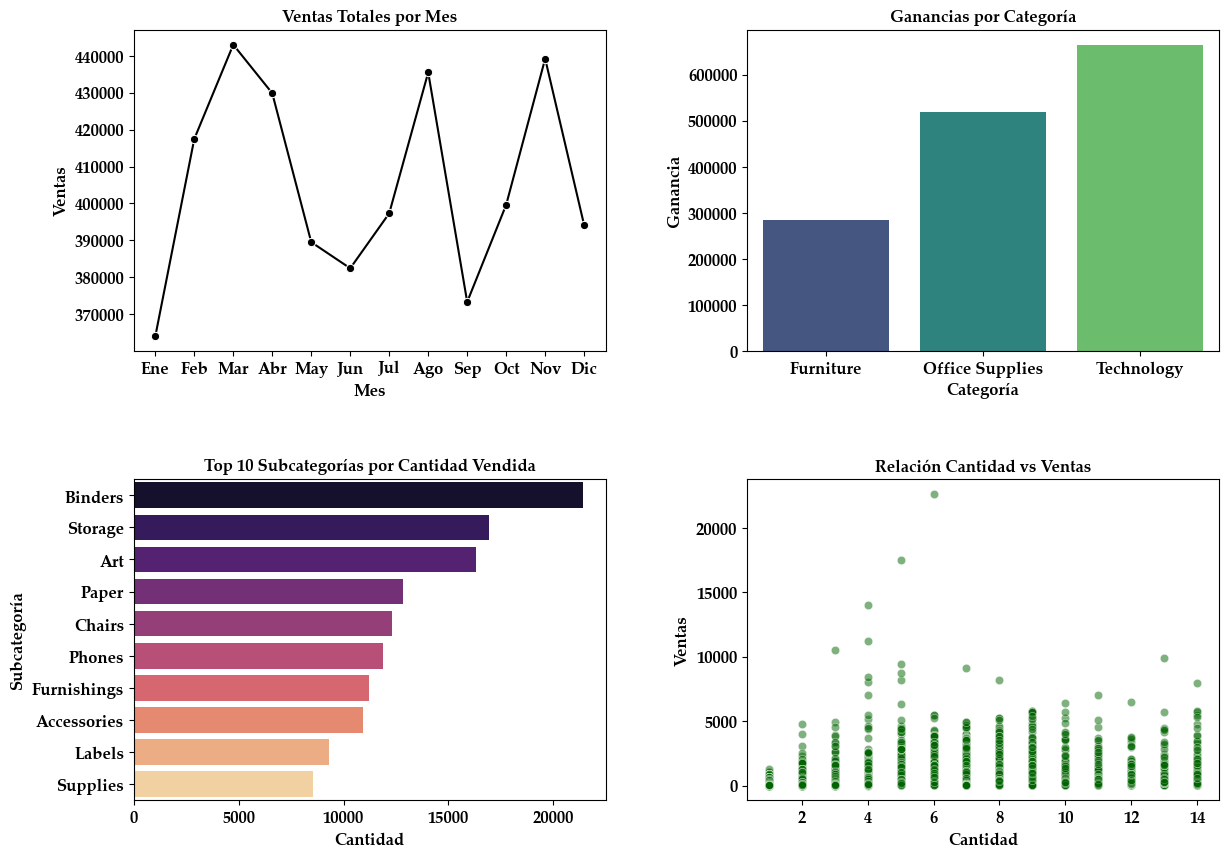

In [39]:
# Ventas por mes
df['month'] = df['order_date'].dt.month
sales_by_month = df.groupby('month')['sales'].sum().reset_index()
month_names = {1:"Ene",2:"Feb",3:"Mar",4:"Abr",5:"May",6:"Jun",
               7:"Jul",8:"Ago",9:"Sep",10:"Oct",11:"Nov",12:"Dic"}
sales_by_month['mes_abbr'] = sales_by_month['month'].map(month_names)

# Ganancia por categoría
profit_by_category = df.groupby('category')['profit'].sum().reset_index()

# Cantidad por subcategoría
qty_by_subcat = df.groupby('sub_category')['quantity'].sum().reset_index().sort_values('quantity', ascending=False).head(10)

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Ventas por mes
sns.lineplot(data=sales_by_month, x='mes_abbr', y='sales', marker='o', color="black", ax=axes[0,0])
axes[0,0].set_title("Ventas Totales por Mes", fontsize=12, weight='bold')
axes[0,0].set_xlabel("Mes")
axes[0,0].set_ylabel("Ventas")

# Ganancias por categoría
sns.barplot(data=profit_by_category, x='category', y='profit', palette="viridis", ax=axes[0,1])
axes[0,1].set_title("Ganancias por Categoría", fontsize=12, weight='bold')
axes[0,1].set_xlabel("Categoría")
axes[0,1].set_ylabel("Ganancia")

# Cantidad por subcategoría
sns.barplot(data=qty_by_subcat, x='quantity', y='sub_category', palette="magma", ax=axes[1,0])
axes[1,0].set_title("Top 10 Subcategorías por Cantidad Vendida", fontsize=12, weight='bold')
axes[1,0].set_xlabel("Cantidad")
axes[1,0].set_ylabel("Subcategoría")

# Scatter cantidad vs ventas
sns.scatterplot(data=df, x='quantity', y='sales', alpha=0.5, color="darkgreen", ax=axes[1,1])
axes[1,1].set_title("Relación Cantidad vs Ventas", fontsize=12, weight='bold')
axes[1,1].set_xlabel("Cantidad")
axes[1,1].set_ylabel("Ventas")

plt.show()

# **Preguntas Clave**

## **¿Cuál es la venta promedio por pedido?**

In [21]:
# calcula las ventas promedio
venta_promedio = df['sales'].mean().round(2)

print(f'Las ventas promedio por por pedido es de: {venta_promedio}')

Las ventas promedio por por pedido es de: 246.49


## **¿Cuál es la ganancia total y el promedio por pedido?**

In [22]:
# calcula la ganancia total y la ganancia promedio
ganancia_total = df['profit'].sum().round(2)
ganancia_promedio = df['profit'].mean().round(2)

# imprime los resultados
print(f'La ganancia total es de: {ganancia_total}')
print(f'La ganancia promedio es de: {ganancia_promedio}')

La ganancia total es de: 1467457.29
La ganancia promedio es de: 28.61


## **¿Qué porcentaje de pedidos tuvieron descuento?**

In [23]:
# calcula la proporción con descuento
pct_con_descuento = round((df[df['discount'] > 0].shape[0] / df.shape[0]) * 100, 2)

# imprime el resultado
print(f'La proporción de pedidos que tuvieron descuento es: {pct_con_descuento}%')

La proporción de pedidos que tuvieron descuento es: 43.44%


## **¿Existe una Relación entre las Ventas y las Ganancias?**

In [24]:
# obtiene la correlación entre ventas y ganancias
corr = df['sales'].corr(df['profit']).round(2)

# imprime el resultado
print(f'La correlación entre ventas y ganancias es: {corr}')

La correlación entre ventas y ganancias es: 0.48


## **¿Cuáles fueron los 3 meses con más ventas?**

In [25]:
#Agrupa ventas por mes
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['month'] = df['order_date'].dt.month
sales_by_month = df.groupby('month')['sales'].sum().reset_index()

# Ordena de mayor a menor
top3_months = sales_by_month.sort_values(by='sales', ascending=False).head(3)

# Imprime resultados con nombres en español
months_es = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
             "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

for i, row in top3_months.iterrows():
    month_name = months_es[int(row['month']) - 1]
    print(f"{month_name}: {row['sales']:,.2f} en ventas")

Marzo: 443,014.04 en ventas
Noviembre: 439,218.48 en ventas
Agosto: 435,505.90 en ventas


## **¿Cuáles fueron los 3 meses con menos ventas?**

In [26]:
# Ordena de mayor a menor
top3_months = sales_by_month.sort_values(by='sales', ascending=True).head(3)

for i, row in top3_months.iterrows():
    month_name = months_es[int(row['month']) - 1]
    print(f"{month_name}: {row['sales']:,.2f} en ventas")

Enero: 364,011.36 en ventas
Septiembre: 373,335.36 en ventas
Junio: 382,443.27 en ventas


# **Análisis Estadístico**

In [27]:
# Estadísticas descriptivas generales
desc = df[['sales','profit','discount','quantity','shipping_cost']].describe()
print(desc)

              sales        profit      discount      quantity  shipping_cost
count  51290.000000  51290.000000  51290.000000  51290.000000   51290.000000
mean     246.490581     28.610982      0.142908      3.476545      26.375915
std      487.565361    174.340972      0.212280      2.278766      57.296804
min        0.444000  -6599.978000      0.000000      1.000000       0.000000
25%       30.758625      0.000000      0.000000      2.000000       2.610000
50%       85.053000      9.240000      0.000000      3.000000       7.790000
75%      251.053200     36.810000      0.200000      5.000000      24.450000
max    22638.480000   8399.976000      0.850000     14.000000     933.570000


In [28]:
# Calcular estadísticas descriptivas básicas
mean_sales = df['sales'].mean()      # promedio de ventas
median_sales = df['sales'].median()  # mediana de ventas
std_sales = df['sales'].std()        # desviación estándar de ventas
max_sales = df['sales'].max()        # valor máximo de ventas
min_sales = df['sales'].min()        # valor mínimo de ventas

print(f"El promedio de ventas es: {mean_sales:.2f}")
print(f"La mediana de ventas es: {median_sales:.2f}")
print(f"La desviación estándar de ventas es: {std_sales:.2f}")
print(f"El valor máximo de ventas es: {max_sales:.2f}")
print(f"El valor mínimo de ventas es: {min_sales:.2f}")

El promedio de ventas es: 246.49
La mediana de ventas es: 85.05
La desviación estándar de ventas es: 487.57
El valor máximo de ventas es: 22638.48
El valor mínimo de ventas es: 0.44


In [29]:
# Probabilidad: ¿Cuál es la probabilidad de que una venta sea mayor al promedio?
prob_sales_above_mean = (df['sales'] > mean_sales).mean()

print(f"La probabilidad de que una venta sea mayor al promedio es: {prob_sales_above_mean:.2%}")

La probabilidad de que una venta sea mayor al promedio es: 25.45%


In [30]:
# Percentiles
p25 = df['sales'].quantile(0.25)  # percentil 25
p75 = df['sales'].quantile(0.75)  # percentil 75
iqr = p75 - p25                   # rango intercuartílico

print(f"El percentil 25 de las ventas es: {p25:.2f}")
print(f"El percentil 75 de las ventas es: {p75:.2f}")
print(f"El rango intercuartílico (IQR) de las ventas es: {iqr:.2f}")

El percentil 25 de las ventas es: 30.76
El percentil 75 de las ventas es: 251.05
El rango intercuartílico (IQR) de las ventas es: 220.29


In [31]:
# Costo de envío promedio
avg_shipping_cost = df['shipping_cost'].mean()
print(f"El costo de envío promedio por orden es: {avg_shipping_cost:,.2f}")

El costo de envío promedio por orden es: 26.38


In [32]:
# Probabilidad de envío gratuito
p_free_shipping = (df[df['shipping_cost'] == 0].shape[0] / df.shape[0]) * 100
print(f"La probabilidad de que una orden tenga envío gratuito es: {p_free_shipping:.2f}%")

La probabilidad de que una orden tenga envío gratuito es: 0.00%


In [33]:
# Correlación entre descuento y ganancia
corr_discount_profit = df['discount'].corr(df['profit'])
print(f"La correlación entre descuento y ganancia es: {corr_discount_profit:.3f}")

La correlación entre descuento y ganancia es: -0.316


In [34]:
# Margen de ganancia promedio
df['profit_margin'] = df['profit'] / df['sales']
avg_profit_margin = df['profit_margin'].mean()
print(f"El margen de ganancia promedio es: {avg_profit_margin:.2%}")

El margen de ganancia promedio es: 4.74%


In [35]:
# Probabilidad de que una orden pertenezca a la categoría más frecuente
top_category = df['category'].value_counts().idxmax()
p_top_category = (df[df['category'] == top_category].shape[0] / df.shape[0]) * 100
print(f"La categoría más frecuente es: {top_category} — "
      f"Probabilidad de que una orden pertenezca a ella: {p_top_category:.2f}%")

La categoría más frecuente es: Office Supplies — Probabilidad de que una orden pertenezca a ella: 60.97%


In [36]:
# Intervalo de confianza para las ventas promedio
mean_sales = df['sales'].mean()
conf_int_sales = stats.t.interval(
    confidence=0.95,
    df=len(df['sales']) - 1,
    loc=mean_sales,
    scale=stats.sem(df['sales'])
)
print(f"Intervalo de confianza (95%) para las ventas promedio: {conf_int_sales[0]:,.2f} a {conf_int_sales[1]:,.2f}")

Intervalo de confianza (95%) para las ventas promedio: 242.27 a 250.71


# **Pruebas Estadísticas**

In [37]:
# Prueba de hipótesis: ¿La ganancia promedio es significativamente distinta de 0?
t_stat, p_value = stats.ttest_1samp(df['profit'], 0)
print(f"T-Statistic: {t_stat:.3f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusión: La ganancia promedio es significativamente distinta de 0 (95% confianza).")
else:
    print("Conclusión: No hay evidencia suficiente para decir que la ganancia promedio difiere de 0.")

T-Statistic: 37.166, p-value: 0.0000
Conclusión: La ganancia promedio es significativamente distinta de 0 (95% confianza).


In [38]:
# Regresión lineal simple: ¿Qué tan bien el descuento explica la ganancia?
X = sm.add_constant(df['discount'])  # Variable independiente
y = df['profit']                     # Variable dependiente
model = sm.OLS(y, X).fit()
print(f"Coeficiente de regresión (descuento): {model.params['discount']:.3f}")
print(f"R2 del modelo: {model.rsquared:.3f}")
print(f"p-value del coeficiente: {model.pvalues['discount']:.4f}")

Coeficiente de regresión (descuento): -259.927
R2 del modelo: 0.100
p-value del coeficiente: 0.0000


In [39]:
# Prueba Chi-cuadrado: ¿Existe relación entre la categoría de producto y el modo de envío?
contingency_table = pd.crosstab(df['category'], df['ship_mode'])
chi2, p_chi, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi2 = {chi2:.2f}, gl = {dof}, p-value = {p_chi:.4f}")
if p_chi < 0.05:
    print("Conclusión: Existe una relación significativa entre categoría y modo de envío.")
else:
    print("Conclusión: No se detecta relación significativa entre categoría y modo de envío.")

Chi2 = 2.06, gl = 6, p-value = 0.9143
Conclusión: No se detecta relación significativa entre categoría y modo de envío.


# **Modelado de Datos**

- Proximamente...